In [1]:
from datasets import load_dataset


In [2]:
def load_bio_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    tokens = []
    labels = []
    current_tokens = []
    current_labels = []
    line_num = 0

    for line in lines:
        try:
            line_num += 1
            line = line.rstrip()
            if line:
                # 处理行首有空格的情况
                if line.startswith(' '):  # 如果行首有空格
                    token = ' '  # 将空格作为 token
                    label = line[1:].strip()  # 剩余部分作为 label
                else:
                    # 正常情况：按第一个空格分割
                    parts = line.split(maxsplit=1)
                    if len(parts) == 1:
                        # 如果只有一位（例如 "O"），则默认标签为 "O"
                        token = parts[0]
                        label = "O"
                    else:
                        # 正常情况：token 和 label 分开
                        token, label = parts
                current_tokens.append(token)
                current_labels.append(label)
            else:
                # 如果遇到空行，表示一个句子的结束
                if current_tokens:
                    tokens.append(current_tokens)
                    labels.append(current_labels)
                    current_tokens = []
                    current_labels = []
        except:
            print(f"Error in line {line_num}: {line}")
            pass

    # 添加最后一个句子（如果存在）
    if current_tokens:
        tokens.append(current_tokens)
        labels.append(current_labels)

    return tokens, labels

# 假设你的BIO数据文件名为 'bio_data.txt'
file_path = '../datasets/raw/medical.train'
tokens, labels = load_bio_data(file_path)

# 打印前5个句子及其标签
for i in range(5):
    print(f"Sentence {i+1}:")
    print("Tokens:", tokens[i])
    print("Labels:", labels[i])
    print()

Sentence 1:
Tokens: ['不', '是']
Labels: ['O', 'O']

Sentence 2:
Tokens: ['现', '头', '昏', '口', '苦']
Labels: ['O', 'O', 'O', 'B-临床表现', 'I-临床表现']

Sentence 3:
Tokens: ['目', '的', '观', '察', '复', '方', '丁', '香', '开', '胃', '贴', '外', '敷', '神', '阙', '穴', '治', '疗', '慢', '性', '心', '功', '能', '不', '全', '伴', '功', '能', '性', '消', '化', '不', '良', '的', '临', '床', '疗', '效']
Labels: ['O', 'O', 'O', 'O', 'B-中医治疗', 'I-中医治疗', 'I-中医治疗', 'I-中医治疗', 'I-中医治疗', 'I-中医治疗', 'I-中医治疗', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'O', 'O', 'O', 'O', 'O']

Sentence 4:
Tokens: ['舒', '肝', '和', '胃', '消', '痞', '汤', '；', '功', '能', '性', '消', '化', '不', '良']
Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断', 'I-西医诊断']

Sentence 5:
Tokens: ['患', '者', '３', 'ａ', '前', '咯', '血', '，', '被', '诊', '断', '为', '肺', '结', '核', '，', '住', '院', '４', '０', '余', '天', 

95% 的输入序列长度 <= 89
95% 的输出序列长度 <= 89


/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1953624567.py:39: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1953624567.py:39: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1953624567.py:39: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1953624567.py:39: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1953624567.py:39: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipyker

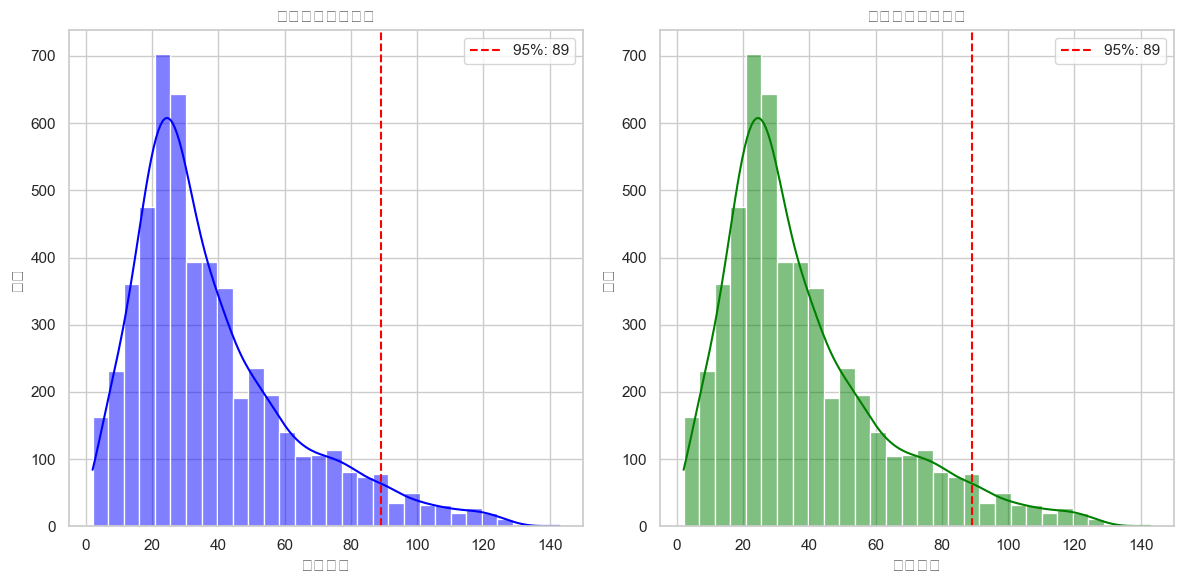

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 统计输入和输出长度
source_lengths = [len(tokens) for tokens in tokens]
target_lengths = [len(labels) for labels in labels]

# 计算百分位数
source_95 = int(np.percentile(source_lengths, 95))
target_95 = int(np.percentile(target_lengths, 95))

print(f"95% 的输入序列长度 <= {source_95}")
print(f"95% 的输出序列长度 <= {target_95}")

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制输入序列长度分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(source_lengths, bins=30, kde=True, color="blue")
plt.axvline(source_95, color='red', linestyle='--', label=f'95%: {source_95}')
plt.title("输入序列长度分布")
plt.xlabel("序列长度")
plt.ylabel("频数")
plt.legend()

# 绘制输出序列长度分布
plt.subplot(1, 2, 2)
sns.histplot(target_lengths, bins=30, kde=True, color="green")
plt.axvline(target_95, color='red', linestyle='--', label=f'95%: {target_95}')
plt.title("输出序列长度分布")
plt.xlabel("序列长度")
plt.ylabel("频数")
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [5]:
import json

def extract_entity_types(labels):
    """从labels中提取实体类型（去掉B-/I-前缀并去重）"""
    entity_types = set()
    for label_list in labels:
        for label in label_list:
            if label != "O":
                entity_type = label.split("-")[1]  # 去掉B-/I-前缀
                entity_types.add(entity_type)
    return list(entity_types)

def convert_to_sft_format(tokens, labels, dataset_name="MEDICAL"):
    sft_data = []
    entity_types = extract_entity_types(labels)  # 提取实体类型

    for i, (token_list, label_list) in enumerate(zip(tokens, labels)):
        # 构造 input
        input_text = "中医药命名实体识别: \n" + "".join(token_list) + "\n答："

        # 构造 target
        entity_dict = {et: [] for et in entity_types}  # 按实体类型分组
        current_entity = None
        current_tokens = []

        for token, label in zip(token_list, label_list):
            if label.startswith("B-"):
                # 如果是新的实体，保存上一个实体
                if current_entity:
                    entity_dict[current_entity].append("".join(current_tokens))
                current_entity = label.split("-")[1]  # 提取实体类型
                current_tokens = [token]  # 开始新的实体
            elif label.startswith("I-"):
                # 如果是实体的中间部分，继续添加token
                current_tokens.append(token)
            else:
                # 如果是O，保存上一个实体
                if current_entity:
                    entity_dict[current_entity].append("".join(current_tokens))
                current_entity = None
                current_tokens = []

        # 保存最后一个实体
        if current_entity:
            entity_dict[current_entity].append("".join(current_tokens))

        # 构造target文本
        target_text = "上述句子中的实体包含：\n"
        no_entity = True
        for et in entity_types:
            if entity_dict[et]:
                no_entity = False
                target_text += f"{et}实体：{'，'.join(entity_dict[et])}\n"
        if no_entity:
            target_text = "上述句子没有指定类型实体"

        # 构造样本
        sample = {
            "input": input_text,
            "target": target_text.strip(),  # 去掉末尾的换行符
            # "answer_choices": entity_types,
            "task_type": "ner",
            "task_dataset": dataset_name,
            "sample_id": f"train-{i}"  # 生成唯一的样本ID
        }
        sft_data.append(sample)

    return sft_data



95% 的输入序列长度 <= 104 字符
95% 的输出序列长度 <= 56 字符


/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1883657997.py:42: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1883657997.py:42: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1883657997.py:42: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1883657997.py:42: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipykernel_77692/1883657997.py:42: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
/var/folders/pv/x61tcdvx4ll2tl93_by_jyt80000gn/T/ipyker

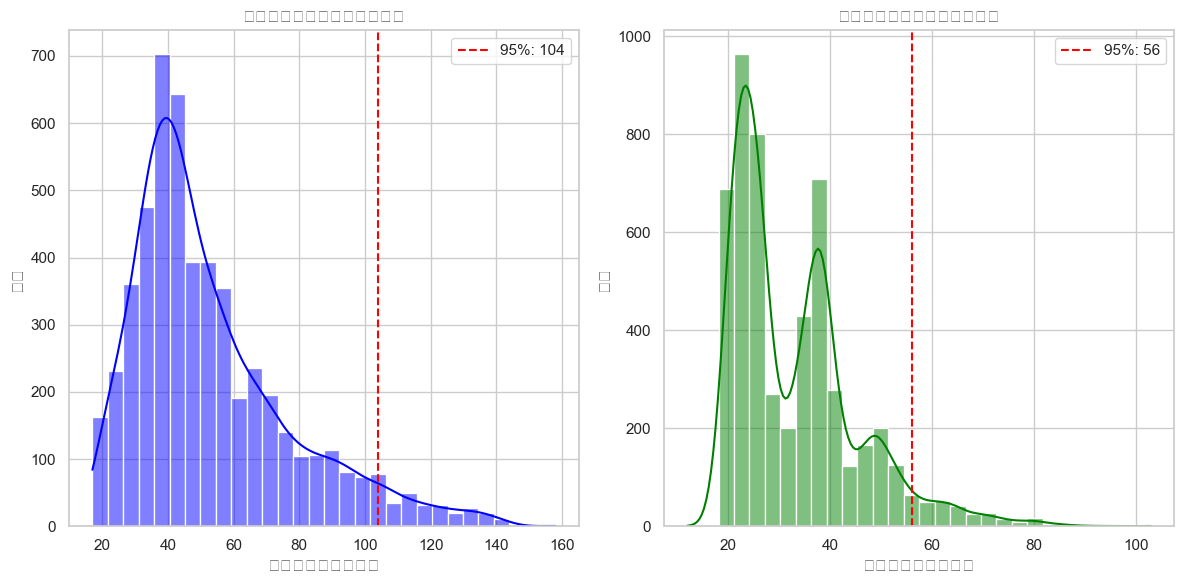

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 sft_data 已经通过 convert_to_sft_format 生成
sft_data = convert_to_sft_format(tokens, labels)

# 统计输入和输出长度
source_lengths = [len(ex["input"]) for ex in sft_data]  # 输入文本的长度（字符数）
target_lengths = [len(ex["target"]) for ex in sft_data]  # 输出文本的长度（字符数）

# 计算百分位数
source_95 = int(np.percentile(source_lengths, 95))
target_95 = int(np.percentile(target_lengths, 95))

print(f"95% 的输入序列长度 <= {source_95} 字符")
print(f"95% 的输出序列长度 <= {target_95} 字符")

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制输入序列长度分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(source_lengths, bins=30, kde=True, color="blue")
plt.axvline(source_95, color='red', linestyle='--', label=f'95%: {source_95}')
plt.title("输入序列长度分布（字符数）")
plt.xlabel("序列长度（字符数）")
plt.ylabel("频数")
plt.legend()

# 绘制输出序列长度分布
plt.subplot(1, 2, 2)
sns.histplot(target_lengths, bins=30, kde=True, color="green")
plt.axvline(target_95, color='red', linestyle='--', label=f'95%: {target_95}')
plt.title("输出序列长度分布（字符数）")
plt.xlabel("序列长度（字符数）")
plt.ylabel("频数")
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [64]:
# 转换为SFT格式
sft_data = convert_to_sft_format(tokens, labels)

# 打印第一个样本
print(json.dumps(sft_data[0], indent=2, ensure_ascii=False))


{
  "input": "中医药命名实体识别: \n不是\n答：",
  "target": "上述句子没有指定类型实体",
  "task_type": "ner",
  "task_dataset": "MEDICAL",
  "sample_id": "train-0"
}


In [65]:

# 保存为 .jsonl 文件
def save_to_jsonl(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        for sample in data:
            f.write(json.dumps(sample, ensure_ascii=False) + '\n')

# 保存为 sft_data.jsonl 文件
output_file_path = 'train.jsonl'
save_to_jsonl(sft_data, output_file_path)

print(f"数据已保存到 {output_file_path}")

数据已保存到 train.jsonl
